-------------
### ライブラリのインポート

In [1]:
# 基本的なライブラリ
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from scipy import stats

# Scikit-learn関連
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_X_y
from sklearn.model_selection import train_test_split

# 抽象基底クラス (ABC)
from abc import ABCMeta, abstractmethod

# タイピングのサポート
from typing import Optional

# 可視化の設定
import matplotlib.pyplot as plt
import japanize_matplotlib
import itertools

plt.style.use("ggplot")

--------
### 実験設定

In [2]:
TARGET = "spend"
THRESHOLD_LIST = [2]  # 外れ値除外の閾値
TRAIN_SIZE = 10000
TEST_SIZE = 10000  # 合計で21306
RANDOM_STATE = 0  # 乱数シード

-----------
### データの前処理

In [ ]:
df_all = pd.read_csv(
    R"C:\Users\HaruMomozu\Documents\Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv"
)

df_all = df_all[df_all["segment"] == "No E-Mail"]

features_list = [
    "recency",
    "history",
    "mens",
    "womens",
    "newbie",
]

variables_list = [
    TARGET,
    "recency",
    "history",
    "mens",
    "womens",
    "newbie",
]

ALL_FEATURES_INDEX = [i for i in range(len(features_list))]

print(df_all)
df_train = df_all.iloc[:TRAIN_SIZE]
df_test = df_all.iloc[TRAIN_SIZE : TRAIN_SIZE + TEST_SIZE]

print(df_train)
print(df_test)

       recency history_segment  history  mens  womens   zip_code  newbie  \
1            6  3) $200 - $350   329.08     1       1      Rural       1   
14           4  3) $200 - $350   241.42     0       1      Rural       1   
15           3    1) $0 - $100    58.13     1       0      Urban       1   
20           9    1) $0 - $100    29.99     0       1  Surburban       1   
23           2    1) $0 - $100    29.99     0       1      Urban       1   
...        ...             ...      ...   ...     ...        ...     ...   
63980        3  4) $350 - $500   487.10     0       1  Surburban       1   
63981        4  2) $100 - $200   125.53     0       1      Rural       1   
63983        2    1) $0 - $100    83.03     0       1      Urban       0   
63987        1    1) $0 - $100    79.70     1       0  Surburban       1   
63990        6    1) $0 - $100    80.02     0       1  Surburban       0   

            channel    segment  visit  conversion  spend  
1               Web  No E-Ma

欠損値除去

In [4]:
# def remove_nan(data: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
#     # 各列に対して、pd.to_numericを使用して数値に変換（エラーがあればNaNにする）
#     df_numeric = data.apply(lambda col: pd.to_numeric(col, errors="coerce"))

#     # 数値に変換できなかった行を抽出（NaNを含む行）
#     df_excluded = data[df_numeric.isna().any(axis=1)]

#     # NaNを含む行を削除
#     df_clean = df_numeric.dropna()

#     return df_excluded, df_clean

In [5]:
# df_train_ex, df_train_clean = remove_nan(df_train)
# df_test_ex, df_test_clean = remove_nan(df_test)
# print(df_train_ex)
# print(df_train_clean)
# print()
# print(df_test_ex)
# print(df_test_clean)

-------------
### 外れ値を除外しない場合

In [6]:
df = df_train

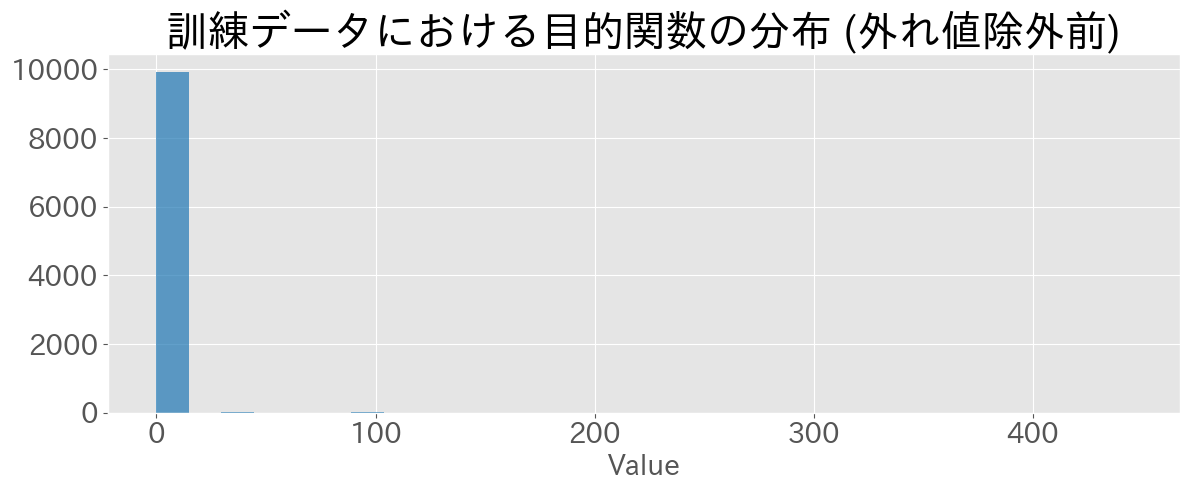

In [7]:
y = df[TARGET]

fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.hist(
    y,
    bins=30,
    color="#1f77b4",
    alpha=0.7,
)
axes.set_title("訓練データにおける目的関数の分布 (外れ値除外前)", fontsize=30)
axes.set_xlabel("Value", fontsize=20)
axes.tick_params(axis="both", labelsize=20)

plt.tight_layout()
plt.show()

-------------
### 外れ値除外

In [8]:
def remove_outliers_zscore(
    data: pd.DataFrame, metric: str, threshold: float
) -> pd.DataFrame:
    z_scores = np.abs(stats.zscore(data[metric]))
    data = data[(z_scores < threshold)]
    return data

閾値：2
外れ値除外前のデータ数（訓練+テスト）: 10000
外れ値除外後のデータ数（訓練+テスト）: 9940
除外されたデータ数： 60
分散:  0.0


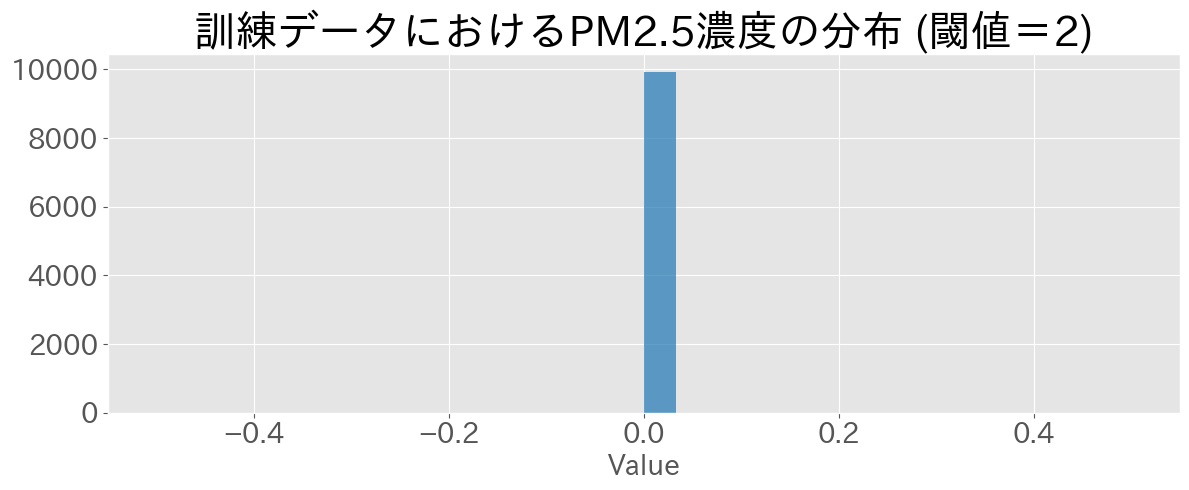

In [9]:
for i in range(len(THRESHOLD_LIST)):
    df_outliers_removed = remove_outliers_zscore(
        data=df, metric=TARGET, threshold=THRESHOLD_LIST[i]
    )
    df_outliers_removed = df_outliers_removed.reset_index(drop=True)  # 行を詰める
    y = df_outliers_removed[TARGET]
    print(f"閾値：{THRESHOLD_LIST[i]}")
    print("外れ値除外前のデータ数（訓練+テスト）:", len(df_train))
    print("外れ値除外後のデータ数（訓練+テスト）:", len(df_outliers_removed))
    print("除外されたデータ数：", len(df_train) - len(df_outliers_removed))
    print("分散: ", np.var(y))
    fig, axes = plt.subplots(1, 1, figsize=(12, 5))
    axes.hist(
        y,
        bins=30,
        color="#1f77b4",
        alpha=0.7,
    )
    axes.set_title(
        f"訓練データにおけるPM2.5濃度の分布 (閾値＝{THRESHOLD_LIST[i]})", fontsize=30
    )
    axes.set_xlabel("Value", fontsize=20)
    axes.tick_params(axis="both", labelsize=20)

    plt.tight_layout()
    plt.show()